In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import tree
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('datasets/Retail_Store.csv' , encoding='latin-1')

Test if Order is Completed or Not

going to exclude dates for shipping and order

filtering out technogloy from department

In [3]:
new_df = df.drop(columns=['Customer Lname','Customer Zipcode','Order Zipcode','Product Description',
                          'Customer Password','Order Customer Id','Order Item Total','Order Profit Per Order',
                          'Product Card Id','Product Category Id','Product Price','Customer Fname',
                          'Product Description','Customer Email','Product Image','Product Status',
                          'Order Id','Order Item Id','Order Item Cardprod Id','shipping date (DateOrders)',
                          'order date (DateOrders)','Days for shipping (real)','Days for shipment (scheduled)',
                          'Customer City','Customer Country', 'Customer Street','Department Id','Category Id',
                          'Latitude','Longitude', 'Order City','Order Item Discount','Product Name','Order State'])

new_df = new_df[new_df['Department Name'] != 'Technology']

In [4]:
new_df.columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer Id',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order Country', 'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order Status', 'Shipping Mode'],
      dtype='object')

In [5]:
new_df.dtypes

Type                         object
Benefit per order           float64
Sales per customer          float64
Delivery Status              object
Late_delivery_risk            int64
Category Name                object
Customer Id                   int64
Customer Segment             object
Customer State               object
Department Name              object
Market                       object
Order Country                object
Order Item Discount Rate    float64
Order Item Product Price    float64
Order Item Profit Ratio     float64
Order Item Quantity           int64
Sales                       float64
Order Region                 object
Order Status                 object
Shipping Mode                object
dtype: object

In [6]:
cat_features = ['Type','Delivery Status','Category Name','Customer Segment','Customer State',
                'Department Name','Market','Order Country','Order Region','Shipping Mode']

In [14]:
cat_features_df = new_df[cat_features]

cat_features_df.head()

,Type,Delivery Status,Category Name,Customer Segment,Customer State,Department Name,Market,Order Country,Order Region,Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Consumer,PR,Fitness,Pacific Asia,Indonesia,Southeast Asia,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Consumer,PR,Fitness,Pacific Asia,India,South Asia,Standard Class
2,CASH,Shipping on time,Sporting Goods,Consumer,CA,Fitness,Pacific Asia,India,South Asia,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Home Office,CA,Fitness,Pacific Asia,Australia,Oceania,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Corporate,PR,Fitness,Pacific Asia,Australia,Oceania,Standard Class


In [22]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = one_hot_encoder.fit_transform(cat_features_df)

feature_names = one_hot_encoder.get_feature_names_out(cat_features_df.columns)
encoded_features_df = pd.DataFrame(one_hot_encoded,columns = feature_names)

encoded_df = pd.concat([new_df.drop(columns=cat_features_df.columns, axis=1), encoded_features_df], axis=1)

print(encoded_df.tail())


        Benefit per order  Sales per customer  Late_delivery_risk  \
175564                NaN                 NaN                 NaN   
175565                NaN                 NaN                 NaN   
176634                NaN                 NaN                 NaN   
176635                NaN                 NaN                 NaN   
176771                NaN                 NaN                 NaN   

        Customer Id  Order Item Discount Rate  Order Item Product Price  \
175564          NaN                       NaN                       NaN   
175565          NaN                       NaN                       NaN   
176634          NaN                       NaN                       NaN   
176635          NaN                       NaN                       NaN   
176771          NaN                       NaN                       NaN   

        Order Item Profit Ratio  Order Item Quantity  Sales Order Status  ...  \
175564                      NaN                  NaN 

In [23]:
encoded_df.isnull()

,Benefit per order,Sales per customer,Late_delivery_risk,Customer Id,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Status,...,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175564,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
175565,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
176634,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
176635,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [26]:
encoded_df_cleaned = encoded_df.dropna(axis=0)

In [27]:
encoded_df_cleaned.isnull()

,Benefit per order,Sales per customer,Late_delivery_risk,Customer Id,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Status,...,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
encoded_df_cleaned['Order Completed'] = encoded_df_cleaned['Order Status'].apply(lambda x: 1 if x in ['COMPLETE', 'CLOSED'] else 0)
encoded_status_df = encoded_df_cleaned
encoded_status_df = encoded_status_df.drop(columns =['Order Status'])
 
encoded_status_df.info

<bound method DataFrame.info of         Benefit per order  Sales per customer  Late_delivery_risk  \
0               91.250000          314.640015                 0.0   
1             -249.089996          311.359985                 1.0   
2             -247.779999          309.720001                 0.0   
3               22.860001          304.809998                 0.0   
4              134.210007          298.250000                 0.0   
...                   ...                 ...                 ...   
179049          52.480000          187.429993                 0.0   
179050          14.130000           43.480000                 1.0   
179051          62.020000          131.949997                 1.0   
179052         -91.309998          130.449997                 1.0   
179053          74.970001          249.899994                 0.0   

        Customer Id  Order Item Discount Rate  Order Item Product Price  \
0           20755.0                      0.04                   

In [29]:
encoded_status_df.dtypes

Benefit per order               float64
Sales per customer              float64
Late_delivery_risk              float64
Customer Id                     float64
Order Item Discount Rate        float64
                                 ...   
Order Region_Western Europe     float64
Shipping Mode_Same Day          float64
Shipping Mode_Second Class      float64
Shipping Mode_Standard Class    float64
Order Completed                   int64
Length: 310, dtype: object

In [30]:
y = encoded_status_df['Order Completed']
x = encoded_status_df.drop('Order Completed', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5, random_state=42)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
accuracy = (y_test == predictions).mean()
print("Decision Tree Classier: Accuracy = {:.3f}".format(accuracy))


Decision Tree Classier: Accuracy = 0.794


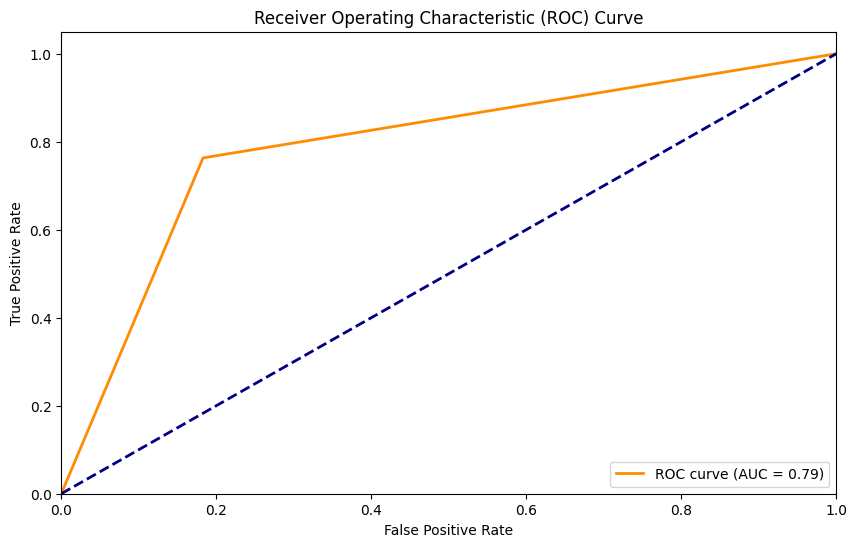

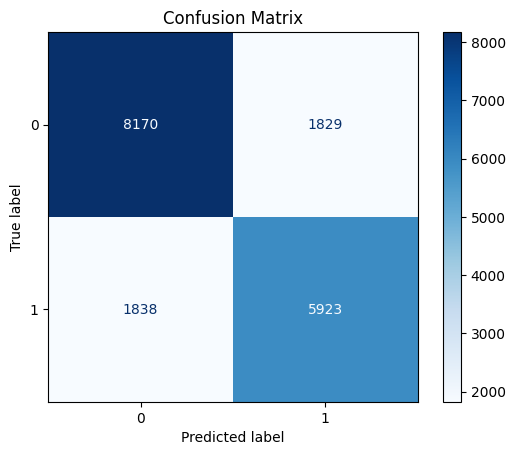

AUC Score: 0.790
F1 Score: 0.764

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      9999
           1       0.76      0.76      0.76      7761

    accuracy                           0.79     17760
   macro avg       0.79      0.79      0.79     17760
weighted avg       0.79      0.79      0.79     17760



In [31]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

predictions = model.predict(x_test)

# Create and plot confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predictions)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Depth = 1, train_acc = 0.6856, eval_acc = 0.6854
Depth = 2, train_acc = 0.6856, eval_acc = 0.6854
Depth = 3, train_acc = 0.7276, eval_acc = 0.7244
Depth = 4, train_acc = 0.7302, eval_acc = 0.7279
Depth = 5, train_acc = 0.7449, eval_acc = 0.7405
Depth = 6, train_acc = 0.7551, eval_acc = 0.7498
Depth = 7, train_acc = 0.7677, eval_acc = 0.7648
Depth = 8, train_acc = 0.7807, eval_acc = 0.7737
Depth = 9, train_acc = 0.7906, eval_acc = 0.7784
Depth = 10, train_acc = 0.8033, eval_acc = 0.7881


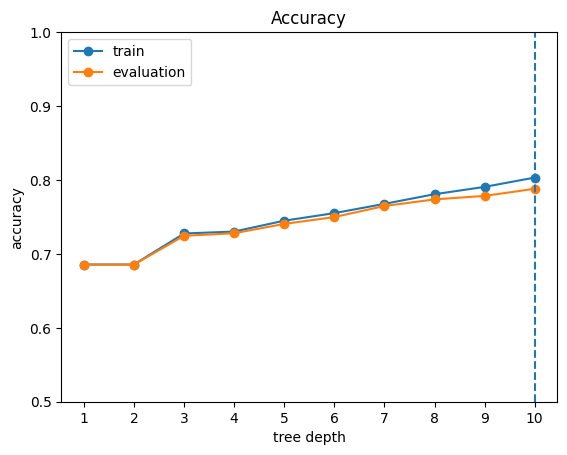

In [32]:
train_acc = []
eval_acc = []
max_depth = 10

for d in range(1, max_depth+1): 
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    predictions_train = model.predict(x_train)
    train_acc.append((predictions_train == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    predictions_eval = model.predict(x_eval)
    eval_acc.append((predictions_eval == y_eval).mean())
    
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
# Add 1 since index starts from 0
opt_depth = np.argmax(eval_acc) + 1


# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

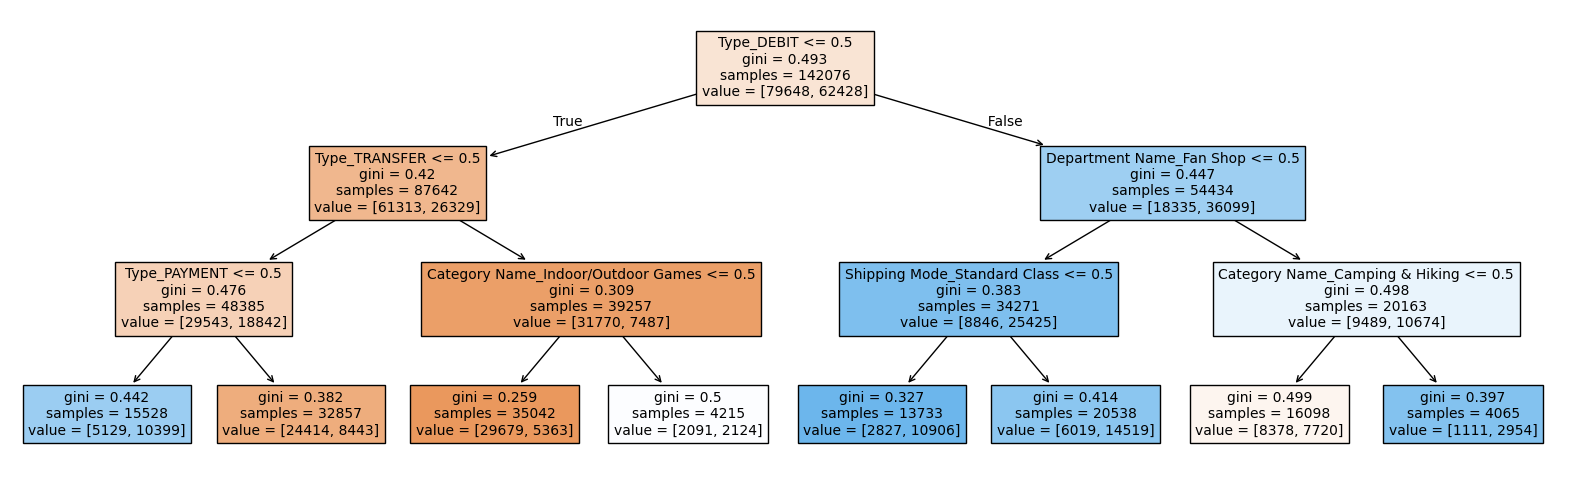

In [33]:
# Visualize the tree
# plt.figure(figsize=(20,10))
model=DecisionTreeClassifier(max_depth=3,
                             random_state=42)
model.fit(x_train,y_train)

feat_names = x.columns.tolist()
plt.figure(figsize=(20,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10, filled=True)
plt.show()


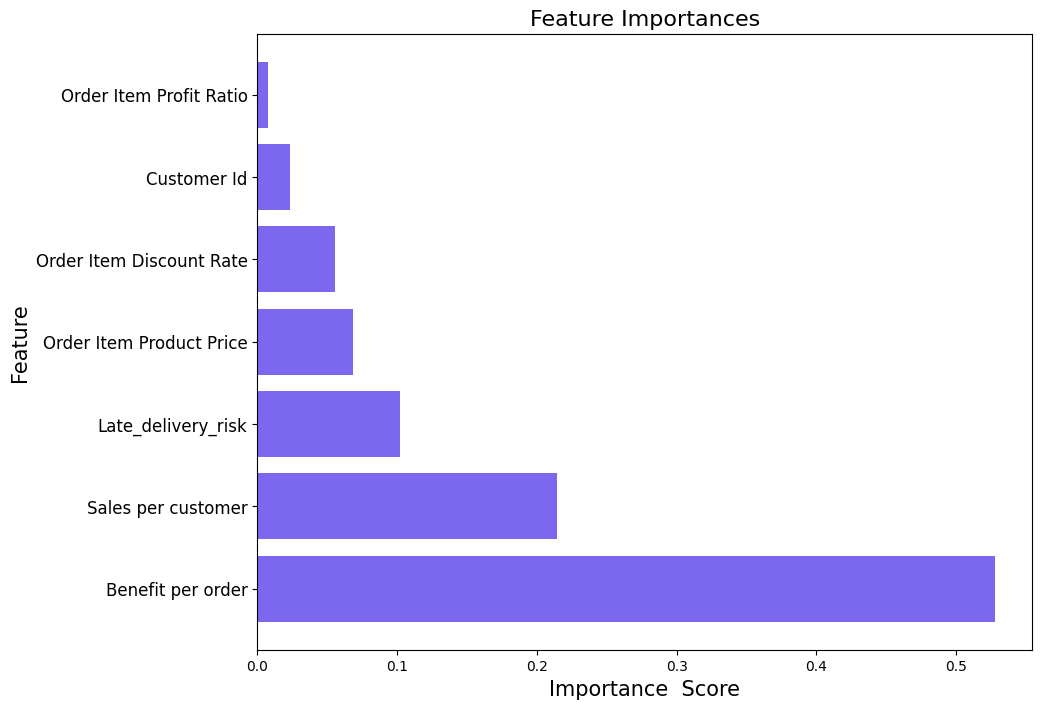

In [34]:
# Get the feature importances from the trained model
feature_importance = model.feature_importances_

# Get the feature names (columns of x_train)
feature_names = np.array(x_train.columns)  # Convert to numpy array for indexing

# Filter out features with importance of 0
non_zero_idx = feature_importance > 0
feature_importance = feature_importance[non_zero_idx]
feat_names = feature_names[non_zero_idx]

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Sort feature importances and feature names
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feat_names = feature_names[sorted_idx]

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(sorted_feature_importance)), sorted_feature_importance, align='center', color='mediumslateblue')
plt.yticks(np.arange(len(sorted_feature_importance)), sorted_feat_names, size=12)
plt.xlabel('Importance  Score', size=15)
plt.ylabel('Feature', size=15)
plt.title('Feature Importances', size=16)
plt.show()
